In [ ]:
# Test csv output from Altair pipeline code

# Created 2019 Nov 18 by E.S.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib qt

In [2]:
df = pd.read_csv("data/test_csv_file_all_iterations_20200210_run_02.csv")

In [3]:
df

,Unnamed: 0,ampl_linear_norm,ampl_linear_norm_0,angle_deg,host_ampl,inject_iteration,last_ampl_step_signed,last_ampl_step_unsigned,noise,rad_asec,rad_pix,s2n,signal
0,0,0.001000,0.001,0.0,29344.667514,0,NaN,NaN,2.760401,1.1,NaN,9.307034,25.691145
1,1,0.001000,0.001,0.0,29344.667514,0,NaN,NaN,2.843545,1.7,NaN,8.778654,24.962497
2,2,0.001000,0.001,0.0,29344.667514,0,NaN,NaN,2.517901,0.5,NaN,7.422480,18.689071
3,3,0.001000,0.001,0.0,29344.667514,0,NaN,NaN,2.376554,0.8,NaN,9.084806,21.590530
4,4,0.001000,0.001,0.0,29344.667514,0,NaN,NaN,4.217543,0.2,NaN,3.299106,13.914121
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,124,0.000403,0.001,0.0,29344.667514,22,-5.000000e-08,5.000000e-08,1.979049,1.4,130.841121,5.000510,9.896253
125,125,0.000452,0.001,0.0,29344.667514,23,1.000000e-08,1.000000e-08,2.277442,1.1,102.803738,4.999940,11.387073
126,126,0.000403,0.001,0.0,29344.667514,23,-5.000000e-08,5.000000e-08,1.979029,1.4,130.841121,4.999902,9.894948
127,127,0.000452,0.001,0.0,29344.667514,24,1.000000e-08,1.000000e-08,2.277447,1.1,102.803738,5.000043,11.387333


In [4]:
# separate by radial position

test_rad020_allaz = df.where(np.logical_and(df["rad_asec"] == 0.20,df["ampl_linear_norm_0"] == 0.001))
test_rad100_allaz = df.where(np.logical_and(df["rad_asec"] == 1.00,df["ampl_linear_norm_0"] == 0.001))
test_rad180_allaz = df.where(np.logical_and(df["rad_asec"] == 1.80,df["ampl_linear_norm_0"] == 0.001))

In [8]:
# separate further by radial and azimuthal position

test_rad020_az000 = df.where(np.logical_and(test_rad020_allaz["rad_asec"] == 0.20,
                                            test_rad020_allaz["angle_deg"] == 0))
test_rad020_az120 = df.where(np.logical_and(test_rad020_allaz["rad_asec"] == 0.20,
                                            test_rad020_allaz["angle_deg"] == 120))
test_rad020_az240 = df.where(np.logical_and(test_rad020_allaz["rad_asec"] == 0.20,
                                            test_rad020_allaz["angle_deg"] == 240))

test_rad100_az000 = df.where(np.logical_and(test_rad100_allaz["rad_asec"] == 1.00,
                                            test_rad100_allaz["angle_deg"] == 0))
test_rad100_az120 = df.where(np.logical_and(test_rad100_allaz["rad_asec"] == 1.00,
                                            test_rad100_allaz["angle_deg"] == 120))
test_rad100_az240 = df.where(np.logical_and(test_rad100_allaz["rad_asec"] == 1.00,
                                            test_rad100_allaz["angle_deg"] == 240))

test_rad180_az000 = df.where(np.logical_and(test_rad180_allaz["rad_asec"] == 1.80,
                                            test_rad180_allaz["angle_deg"] == 0))
test_rad180_az120 = df.where(np.logical_and(test_rad180_allaz["rad_asec"] == 1.80,
                                            test_rad180_allaz["angle_deg"] == 120))
test_rad180_az240 = df.where(np.logical_and(test_rad180_allaz["rad_asec"] == 1.80,
                                            test_rad180_allaz["angle_deg"] == 240))

In [9]:
df["angle_deg"].drop_duplicates()

0    0.0
Name: angle_deg, dtype: float64

# Amplitude convergence

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


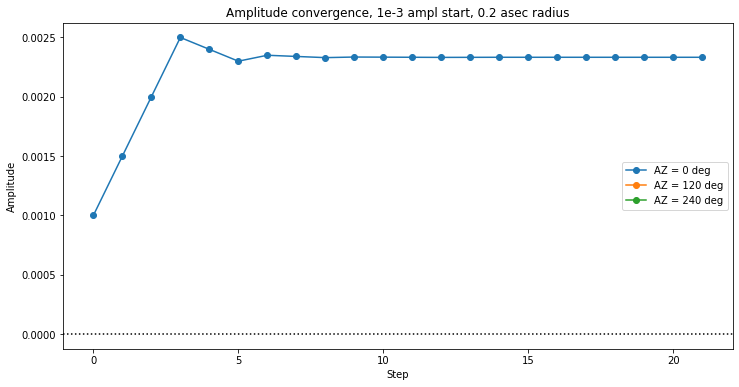

In [10]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,6), sharey=True)

ax1.axhline(y=0, linestyle=":", color="k")
ax1.plot(test_rad020_az000["inject_iteration"].dropna(),
         test_rad020_az000["ampl_linear_norm"].dropna(), marker='o', label="AZ = 0 deg")
ax1.plot(test_rad020_az120["inject_iteration"].dropna(),
         test_rad020_az120["ampl_linear_norm"].dropna(), marker='o', label="AZ = 120 deg")
ax1.plot(test_rad020_az240["inject_iteration"].dropna(),
         test_rad020_az240["ampl_linear_norm"].dropna(), marker='o', label="AZ = 240 deg")
#ax1.set_ylim([-0.001,0.005])
#ax1.set_xlim([-1,12])
ax1.set_xlabel("Step")
ax1.set_ylabel("Amplitude")
ax1.set_title("Amplitude convergence, 1e-3 ampl start, 0.2 asec radius")
ax1.legend()

f.show()
plt.savefig("junk.pdf")

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


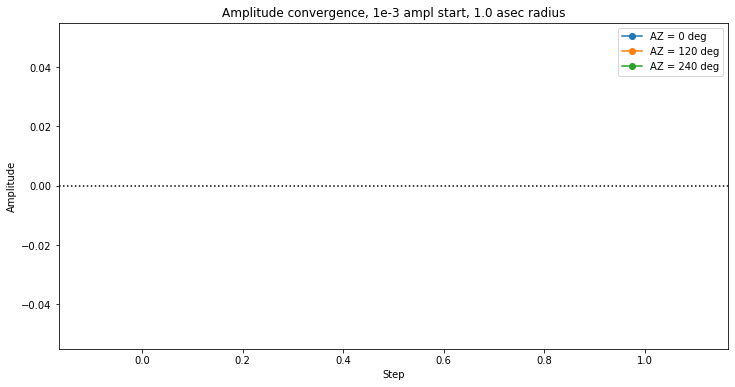

In [7]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,6), sharey=True)

ax1.axhline(y=0, linestyle=":", color="k")
ax1.plot(test_rad100_az000["inject_iteration"].dropna(),
         test_rad100_az000["ampl_linear_norm"].dropna(), marker='o', label="AZ = 0 deg")
ax1.plot(test_rad100_az120["inject_iteration"].dropna(),
         test_rad100_az120["ampl_linear_norm"].dropna(), marker='o', label="AZ = 120 deg")
ax1.plot(test_rad100_az240["inject_iteration"].dropna(),
         test_rad100_az240["ampl_linear_norm"].dropna(), marker='o', label="AZ = 240 deg")
#ax1.set_ylim([-0.001,0.005])
#ax1.set_xlim([-1,12])
ax1.set_xlabel("Step")
ax1.set_ylabel("Amplitude")
ax1.set_title("Amplitude convergence, 1e-3 ampl start, 1.0 asec radius")
ax1.legend()

f.show()
plt.savefig("junk.pdf")

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


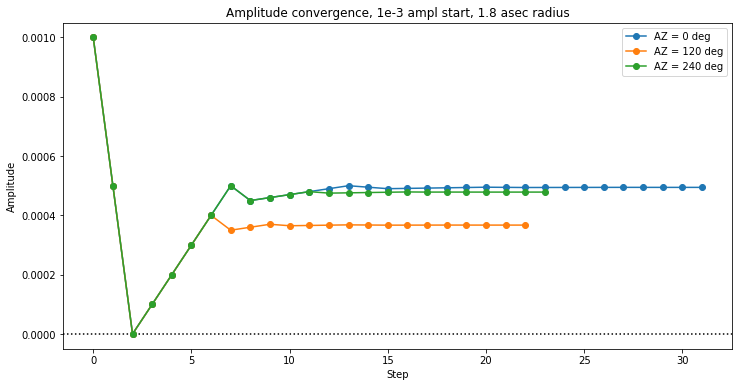

In [24]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,6), sharey=True)

ax1.axhline(y=0, linestyle=":", color="k")
ax1.plot(test_rad180_az000["inject_iteration"].dropna(),
         test_rad180_az000["ampl_linear_norm"].dropna(), marker='o', label="AZ = 0 deg")
ax1.plot(test_rad180_az120["inject_iteration"].dropna(),
         test_rad180_az120["ampl_linear_norm"].dropna(), marker='o', label="AZ = 120 deg")
ax1.plot(test_rad180_az240["inject_iteration"].dropna(),
         test_rad180_az240["ampl_linear_norm"].dropna(), marker='o', label="AZ = 240 deg")
#ax1.set_ylim([-0.001,0.005])
#ax1.set_xlim([-1,12])
ax1.set_xlabel("Step")
ax1.set_ylabel("Amplitude")
ax1.set_title("Amplitude convergence, 1e-3 ampl start, 1.8 asec radius")
ax1.legend()

f.show()
plt.savefig("junk.pdf")

# S/N convergence

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


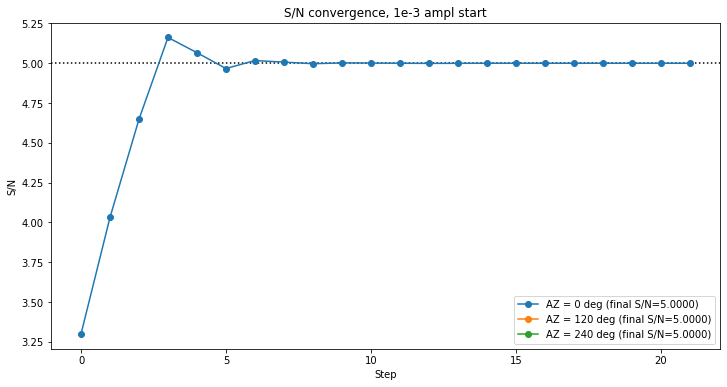

In [11]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,6), sharey=True)

ax1.axhline(y=5, linestyle=":", color="k")
ax1.plot(test_rad020_az000["inject_iteration"].dropna(),test_rad020_az000["s2n"].dropna(), marker='o', 
         label="AZ = 0 deg (final S/N=5.0000)")
ax1.plot(test_rad020_az120["inject_iteration"].dropna(),test_rad020_az120["s2n"].dropna(), marker='o', 
         label="AZ = 120 deg (final S/N=5.0000)")
ax1.plot(test_rad020_az240["inject_iteration"].dropna(),test_rad020_az240["s2n"].dropna(), marker='o', 
         label="AZ = 240 deg (final S/N=5.0000)")
#ax1.set_ylim([-0.001,0.005])
ax1.set_xlabel("Step")
ax1.set_ylabel("S/N")
ax1.set_title("S/N convergence, 1e-3 ampl start")
ax1.legend()

f.show()
plt.savefig("junk.pdf")

In [21]:
iter_num = test_rad020_az000["inject_iteration"].dropna()

In [22]:
s2n = np.subtract(test_rad020_az000["s2n"].dropna(),5)

In [29]:
ampl_change = test_rad020_az000["last_ampl_step_signed"].dropna()

In [42]:
ampl_change

10     5.000000e-04
16     5.000000e-04
22     5.000000e-04
28    -1.000000e-04
34    -1.000000e-04
40     5.000000e-05
46    -1.000000e-05
52    -1.000000e-05
58     5.000000e-06
64    -1.000000e-06
70    -1.000000e-06
76    -1.000000e-06
82     5.000000e-07
88     5.000000e-07
94    -1.000000e-07
99     5.000000e-08
104   -1.000000e-08
108   -1.000000e-08
112   -1.000000e-08
116   -1.000000e-08
120   -1.000000e-08
Name: last_ampl_step_signed, dtype: float64

In [38]:
plt.clf()
plt.plot(iter_num,s2n)
plt.axhline(y=0.005, linestyle=":")
plt.axhline(y=-0.005, linestyle=":")
plt.ylim([-0.01,0.01])
plt.show()

plt.clf()
plt.plot(iter_num[1:],ampl_change)
#plt.ylim([-0.01,0.01])
plt.show()

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


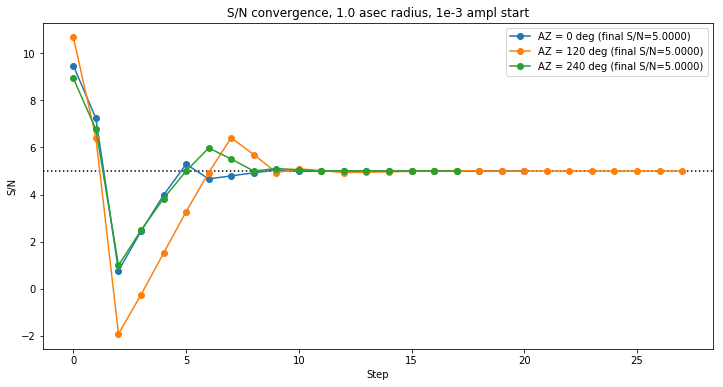

In [34]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,6), sharey=True)

ax1.axhline(y=5, linestyle=":", color="k")
ax1.plot(test_rad100_az000["inject_iteration"].dropna(),test_rad100_az000["s2n"].dropna(), marker='o', 
         label="AZ = 0 deg (final S/N=5.0000)")
ax1.plot(test_rad100_az120["inject_iteration"].dropna(),test_rad100_az120["s2n"].dropna(), marker='o', 
         label="AZ = 120 deg (final S/N=5.0000)")
ax1.plot(test_rad100_az240["inject_iteration"].dropna(),test_rad100_az240["s2n"].dropna(), marker='o', 
         label="AZ = 240 deg (final S/N=5.0000)")
#ax1.set_ylim([-0.001,0.005])
ax1.set_xlabel("Step")
ax1.set_ylabel("S/N")
ax1.set_title("S/N convergence, 1.0 asec radius, 1e-3 ampl start")
ax1.legend()

f.show()
plt.savefig("junk.pdf")

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


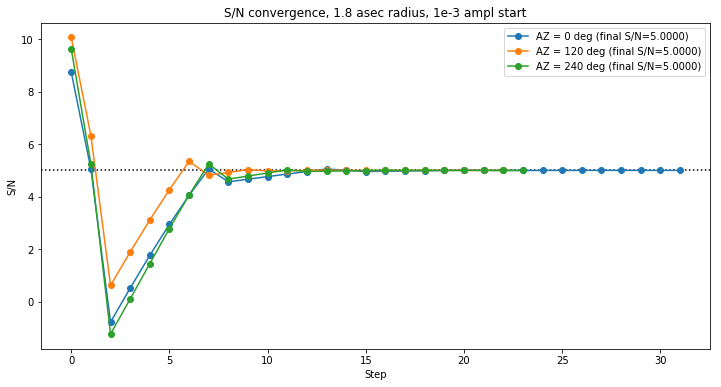

In [35]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,6), sharey=True)

ax1.axhline(y=5, linestyle=":", color="k")
ax1.plot(test_rad180_az000["inject_iteration"].dropna(),test_rad180_az000["s2n"].dropna(), marker='o', 
         label="AZ = 0 deg (final S/N=5.0000)")
ax1.plot(test_rad180_az120["inject_iteration"].dropna(),test_rad180_az120["s2n"].dropna(), marker='o', 
         label="AZ = 120 deg (final S/N=5.0000)")
ax1.plot(test_rad180_az240["inject_iteration"].dropna(),test_rad180_az240["s2n"].dropna(), marker='o', 
         label="AZ = 240 deg (final S/N=5.0000)")
#ax1.set_ylim([-0.001,0.005])
ax1.set_xlabel("Step")
ax1.set_ylabel("S/N")
ax1.set_title("S/N convergence, 1.8 asec radius, 1e-3 ampl start")
ax1.legend()

f.show()
plt.savefig("junk.pdf")